<a href="https://colab.research.google.com/github/datascience-vivek/Random_Forest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Sagar-modelling/ML_Live_Class/main/data/rock_density_xray.csv")

In [ ]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.columns = ['Signal', 'Density']
df.columns

Index(['Signal', 'Density'], dtype='object')

In [ ]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


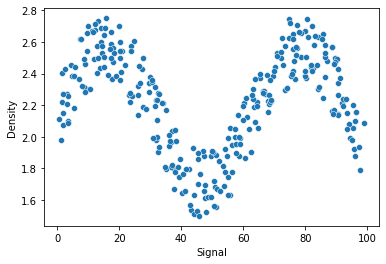

In [ ]:
sns.scatterplot(x='Signal', y = 'Density', data =df)

In [ ]:
##Linear Regression
x= df['Signal'].values.reshape(-1, 1)
y = df['Density'].values.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.1, random_state= 101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_preds = lr_model.predict(x_test)
lr_preds

array([[2.22029657],
       [2.22047771],
       [2.22035637],
       [2.22034337],
       [2.22039737],
       [2.22050555],
       [2.22042659],
       [2.22028877],
       [2.22034673],
       [2.22029714],
       [2.22041506],
       [2.22050153],
       [2.22043891],
       [2.22042003],
       [2.22047022],
       [2.22032403],
       [2.22033377],
       [2.22030628],
       [2.22035154],
       [2.22035373],
       [2.22029266],
       [2.22036798],
       [2.22033018],
       [2.22030611],
       [2.22042754],
       [2.22044019],
       [2.2204142 ],
       [2.22040303],
       [2.22048946],
       [2.22047495]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [ ]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [ ]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds

array([[2.22028446],
       [2.22028673],
       [2.22028899],
       [2.22029126],
       [2.22029353],
       [2.22029579],
       [2.22029806],
       [2.22030032],
       [2.22030259],
       [2.22030485],
       [2.22030712],
       [2.22030938],
       [2.22031165],
       [2.22031391],
       [2.22031618],
       [2.22031844],
       [2.22032071],
       [2.22032297],
       [2.22032524],
       [2.2203275 ],
       [2.22032977],
       [2.22033204],
       [2.2203343 ],
       [2.22033657],
       [2.22033883],
       [2.2203411 ],
       [2.22034336],
       [2.22034563],
       [2.22034789],
       [2.22035016],
       [2.22035242],
       [2.22035469],
       [2.22035695],
       [2.22035922],
       [2.22036148],
       [2.22036375],
       [2.22036602],
       [2.22036828],
       [2.22037055],
       [2.22037281],
       [2.22037508],
       [2.22037734],
       [2.22037961],
       [2.22038187],
       [2.22038414],
       [2.2203864 ],
       [2.22038867],
       [2.220

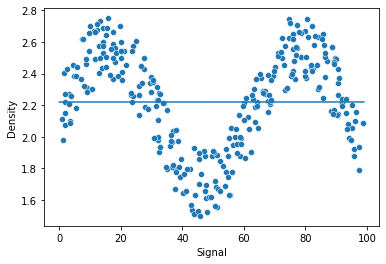

In [ ]:
sns.scatterplot(x = 'Signal', y= 'Density', data=df)
plt.plot(signal_range, signal_preds)

Polynomial Regressioon

In [ ]:
def run_model(model, x_train, y_train,x_test, y_test):
  ##Fit the model to training dataset
  model.fit(x_train, y_train)
  ##performance metrics
  preds = model.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  mae = mean_absolute_error(y_test,preds)
  print(f'RMSE: {rmse}')
  print(f'MAE:{mae}')

  ##PLot Results Model Signal range
  signal_range = np.arange(0,100)
  signal_preds = model.predict(signal_range.reshape(-1,1))

  sns.scatterplot(x = 'Signal', y='Density', data=df, color = 'green')
  plt.plot(signal_range, signal_preds)

In [ ]:
model = LinearRegression()## It is not applicable highly non linear

RMSE: 0.2570051996584629
MAE:0.211198973318633


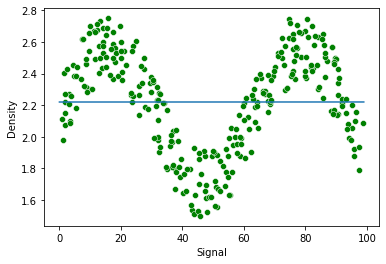

In [ ]:
run_model(model, x_train, y_train,x_test, y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

RMSE: 0.2817309563725596
MAE:0.22903105443511335


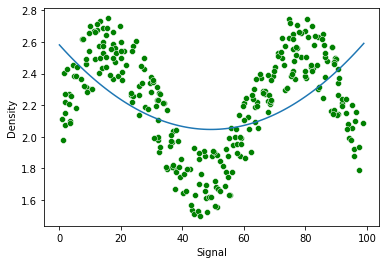

In [ ]:
run_model(pipe,x_train, y_train,x_test, y_test )##It is not performing well

RMSE: 0.14588633404153256
MAE:0.11847642792189521


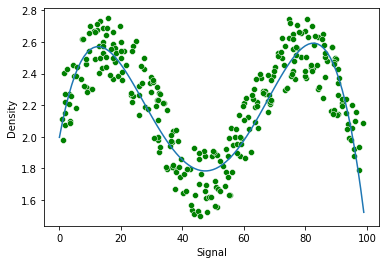

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())##Performing well
run_model(pipe,x_train, y_train,x_test, y_test )

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE:0.11877297474442378


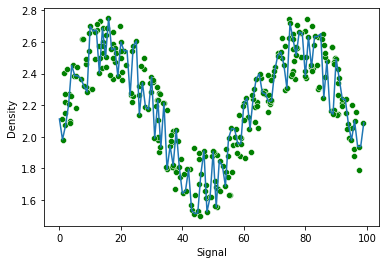

RMSE: 0.13730685016923647
MAE:0.12198383614100558


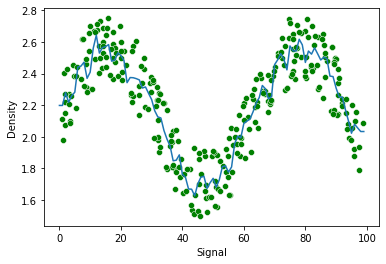

RMSE: 0.13277855732740926
MAE:0.11635971693292672


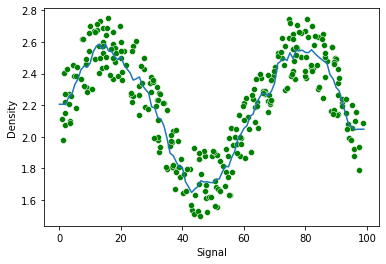

RMSE: 0.15954234753677107
MAE:0.13363165935705318


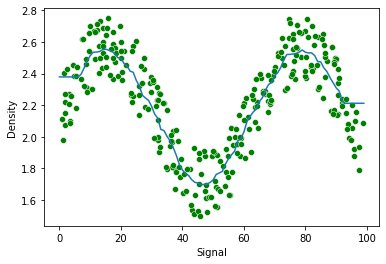

In [ ]:
k_values = [1,5,10,30]
for n in k_values:
  model = KNeighborsRegressor(n_neighbors=n)
  run_model(model,x_train, y_train,x_test, y_test)
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()##Not performing well high variance

RMSE: 0.1523487028635337
MAE:0.11877297474442378


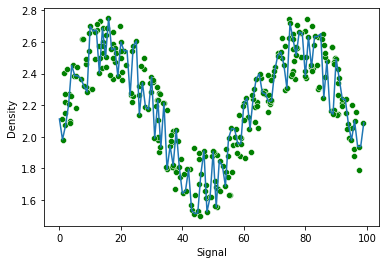

In [ ]:
run_model(model,x_train, y_train,x_test, y_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()##Performing good
param_grid = {'C': [0.01,0.1,1,10,100,1000], 'gamma': ['auto', 'scale']}
grid_model = GridSearchCV(svr, param_grid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RMSE: 0.12646999302044373
MAE:0.10854210121345335


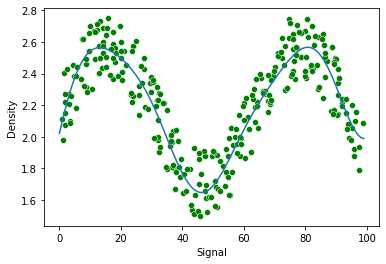

In [ ]:
run_model(grid_model,x_train, y_train,x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators= 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.13604705413568097
MAE:0.11199093092992049


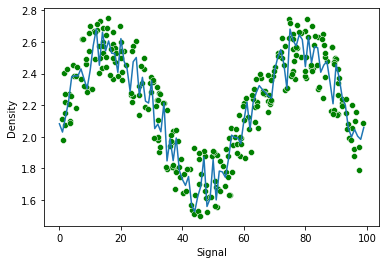

In [ ]:
run_model(rf,x_train, y_train,x_test, y_test )

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [ ]:
model = GradientBoostingRegressor()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.13294148649584667
MAE:0.11318284854800689


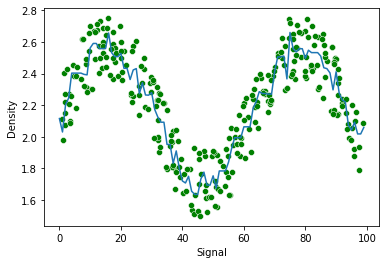

In [ ]:
run_model(model,x_train, y_train,x_test, y_test)

In [ ]:
model = AdaBoostRegressor()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.13856992761165104
MAE:0.11984977731246972


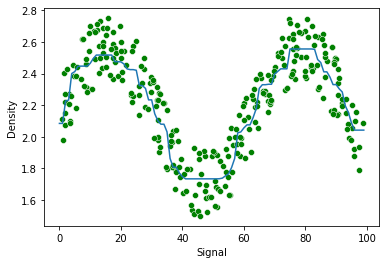

In [ ]:
run_model(model,x_train, y_train,x_test, y_test)